<h1> Natural Langauge Processing Application </h1>
<h2> by Nathan Dilla & John Haviland </h2>

<h3> Problem Statement </h3>
The purpose of this natural language processing (NLP) application is to detect offensive/hate speech using tweets from Twitter/X users. Using a vast corpus, we hope to make it so the detection of offensive/hate speech can become easier and Twitter/X can become a safer, more tolerable community for all of its users.

<h3> Algorithm of the Solution </h3>

For our NLP application, we are using a dataset of 24,783 tweets. The dataset has 3 different classes to distinguish the tweets with:

    - Offensive tweets (0)

    - Hate Speech tweets (1)
    
    - Neutral tweets (2)

<h3> Step 1: Import Libraries & Load Dataset </h3>

The libraries that are needed to fully create the NLP application are imported into the program. Also, the 'labeled_data' dataset is loaded into the application from the CSV file using the 'Pandas' library.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

data = pd.read_csv('labeled_data.csv')
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


<h3> Step 2: Visualize Dataset </h3>

The sentiment counts from the dataset are printed. We also create a barplot that shows the sentiment distribution between the classes.

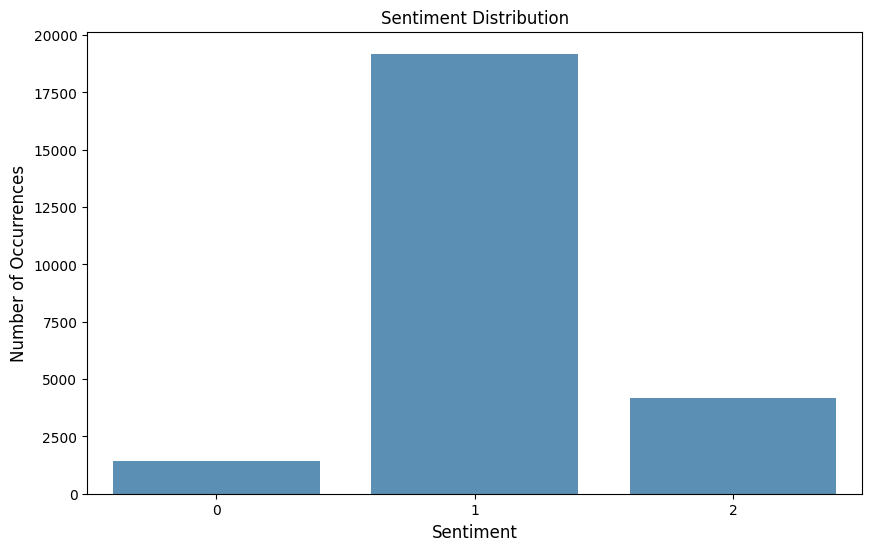

In [4]:
sentiment_counts = data['class'].value_counts()
sentiment_counts

plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, alpha=0.8)
plt.title('Sentiment Distribution')
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Sentiment (Class)', fontsize=12)
plt.show()

<h3> Step 3: Data/Text Preprocessing </h3>

In this step, we remove any character that is not a letter, digit, underscore, or space and "replaces" it with an empty string. After, we download 'stopwords' from the NLTK library, set it to English, and create a function that removes any common English stopwords from the dataset text.

In [5]:
# remove punctuation, special characters
data['tweet'] = data['tweet'].str.replace(r'[^\w\s]', '', regex=True)
data.head()

# download and load list of English stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# function that removes stopwords from the dataset text
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in stop_words]
        return ' '.join(filtered_words)
    else:
        return text

data['tweet'] = data['tweet'].apply(remove_stopwords)
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,RT mayasolovely As a woman you shouldnt compl...
1,1,3,0,3,0,1,RT mleew17 boy dats coldtyga dwn bad for cuff...
2,2,3,0,3,0,1,RT UrKindOfBrand Dawg RT 80sbaby4life You eve...
3,3,3,0,2,1,1,RT C_G_Anderson viva_based she look like a tr...
4,4,6,0,6,0,1,RT ShenikaRoberts The shit you hear about me ...


<h3> Step 4: TF-IDF Vectorization / Train-Test Split </h3>

We use the TF-IDF vectorization from the 'SKLearn' library in order to convert the preprocessed text data into numerical feature vectors that are used for analysis. The dataset is then split into training and testing datasets with an 80:20 split, respectively.

In [8]:
tfidf_vectorizer = TfidfVectorizer()
x = tfidf_vectorizer.fit_transform(data['tweet'].fillna(''))
tfidf_df = pd.DataFrame(x.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

top_words = tfidf_df.iloc[0].sort_values(ascending=False).head(10)
top_words

training_data, testing_data = train_test_split(data, test_size=0.20, random_state=42)
print(f"Training dataset shape: {training_data.shape}")
print(f"Testing dataset shape: {testing_data.shape}")

x_train = tfidf_vectorizer.fit_transform(training_data['tweet'].fillna(''))
x_test = tfidf_vectorizer.transform(testing_data['tweet'].fillna(''))

y_train = training_data['class']
y_test = testing_data['class']


<h3> Step 5: Model Training & Evaluation </h3>

To train the model, we take a logistic regression model and train it on the training data that has been transformed by the TF-IDF vectorizer. We then assess the model's performance on the test set by calculating its accuracy and generating a classification report, also using functions from the 'SKLearn' library.

In [13]:
# train model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

#  evaluate model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


LogisticRegression(max_iter=1000)

<h3> Step 6: Model Predictions </h3>

After the model is trained and evaluated, we use the train model to try and predict the sentiments of a list of example statements. Some of these statements contain obvious usage of hate speech or offensive statements, while a few of them do not. After these statements are defined, they are transformed using the TF-IDF vectorizer and then are passed to the model to predict the sentiments.

This may not be needed, but...

DISCLAIMER: SOME OF THE DEFINED STATEMENTS ARE ONLY TO TEST THE MODEL WITH OBVIOUS EXAMPLES.

In [ ]:
# define statements
statements = [
    "I hate black people.",
    "Jewish people are ruining the economy.",
    "suck my balls",
    "I love you",
    "I am having a great day."
]

# Transform the statements using the TF-IDF vectorizer:
x_statements = tfidf_vectorizer.transform(statements)

#  Predict the sentiment:
predicted_sentiments = model.predict(x_statements)

for statement, sentiment in zip(statements, predicted_sentiments):
    print(f"Statement: {statement}")
    print(f"Predicted Sentiment: {sentiment}\n")


<h3> Step 7: Confusion Matrix Visualization </h3>

In order to evaluate our model, we compute and visualize the confusion matrix. Our confusion matrix is a 3x3 matrix where each row represents the actual class labels and each column represents the predicted class labels. For example, if a tweet is actually labelled as offensive (1) but the model predicts it to be neutral (2), then that instance would go into the middle right cell.

The 'confusion_matrix' function from the 'SKLearn' library is used to compute the matrix, while the 'Seaborn' library is used to visualize the matrix by creating a heatmap.


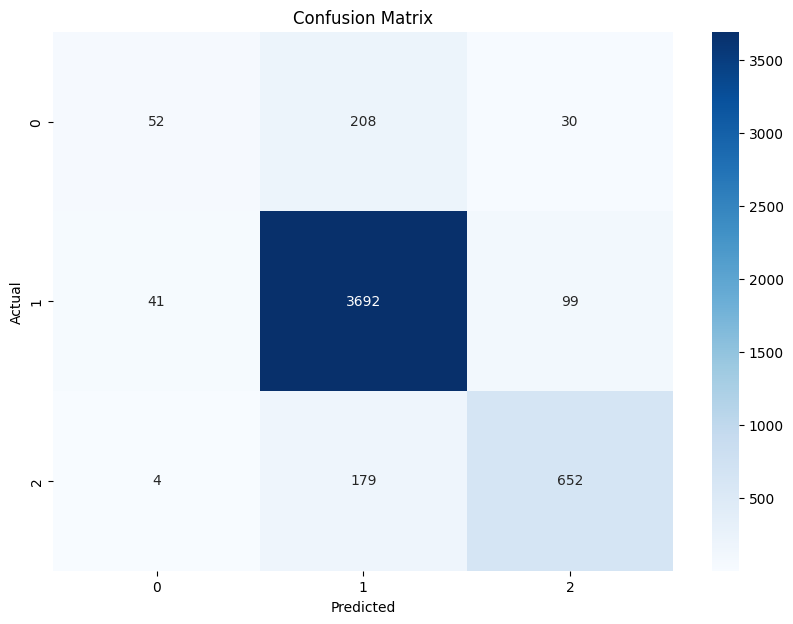

In [17]:
# Compute the confusion matrix:
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=model.classes_, 
            yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Project Summary: Sentiment Analysis on Twitter Hate Speech and Offensive Language

## Overview
The project aims to develop a system that analyzes Twitter data to identify hate speech, offensive language, and neutral content. We utilized a labeled dataset containing thousands of sample tweets, each rated with a class of 0 (hate speech), 1 (offensive language), or 2 (neutral). The data was preprocessed to remove stop words, user @mentions, and non-alphabetical characters. We then transformed the text using Term Frequency-Inverse Document Frequency (TF-IDF) and trained a logistic regression model to classify the tweets. The model's performance was evaluated using a confusion matrix.

## Preprocessing
The dataset underwent a rigorous preprocessing stage where:
1. Stop words were removed to focus on meaningful content.
2. User @mentions were eliminated to maintain user privacy.
3. Non-alphabetical characters were filtered out to clean the data.
After preprocessing, we split the data into training and testing sets with an 80:20 ratio.

## Model and Evaluation
For the model, we employed the TF-IDF Vectorizer to transform the text data. A logistic regression model was then fitted to the training data. The evaluation metrics included precision, recall, f1-score, and support, which were derived from the confusion matrix.

## Findings
The model demonstrated a satisfactory performance in classifying tweets into the respective categories of hate speech, offensive language, and neutral content. The precision, recall, and f1-score provided insights into the model's accuracy and reliability.

## Suitability for Sentiment Analysis
The system proves to be a valuable tool for sentiment analysis, especially in identifying harmful content on social media platforms like Twitter. It can be utilized by organizations and individuals alike to monitor and filter out offensive language and hate speech, thereby fostering a positive and inclusive online environment.

## Conclusion
In conclusion, our sentiment analysis system showcases the potential of machine learning models in addressing the prevalent issue of hate speech and offensive language on social media platforms. The use of a labeled dataset, coupled with effective preprocessing and a robust logistic regression model, has paved the way for accurate classification of tweets. The findings from this project can be utilized to further enhance online safety and promote a healthy digital space for users worldwide.

<h3> References </h3>

ChatGPT

CS courses Padlet (by Professor Isac Artzi)